This is a derivation of QP production by DM scattering. Following the supplementary material of [this work](https://www.google.com/search?client=safari&rls=en&q=Directional+Detection+of+Light+Dark+Matter+in+Superconductors++Yonit+Hochberg%2C1+Eric+David+Kramer%2C1+Noah+Kurinsky%2C2%2C+3%2C+4+and+Benjamin+V.+Lehmann%2C5%2C&ie=UTF-8&oe=UTF-8).

# DM Interactions

Lowest order Cooper-pair breaking rate integrated over all energy:

$$
\Gamma\left(v_\chi\right)=\int \frac{\mathrm{d}^3 \mathbf{q}}{(2 \pi)^3}|V(\mathbf{q})|^2 \frac{2 \mathbf{q}^2}{e^2} \operatorname{Im}\frac{\operatorname{Im} \epsilon_{\mathrm{BCS}}^{(\mathrm{RPA})}\left(\mathbf{q}, \omega_{\mathbf{q}}\right)}{\left|\epsilon_{\mathrm{L}}\left(\mathbf{q}, \omega_{\mathbf{q}}\right)\right|^2}
$$

where the Lindhard function $\epsilon_{\mathrm{L}} \equiv \epsilon_{\mathrm{FEG}}^{(\mathrm{RPA})}$ is the RPA dielectric function for a free electron gas (FEG), and  accounts for screening and in-medium effects in a normal metal.

$$
\begin{aligned}
\operatorname{Im}\left(\epsilon_{\mathrm{BCS}}^{(\mathrm{RPA})}(\mathbf{q}, \omega)\right) & =\frac{\pi e^2}{\mathbf{q}^2} S(\mathbf{q}, \omega) \\
&= \frac{\pi e^{2}}{\mathbf{q}^{2}} 
\sum_{f} \left| \left\langle f \middle| \rho_{e}(\mathbf{q}) \middle| 0 \right\rangle \right|^{2}
\delta\!\left(\omega - E_{f}\right) \\

& =\frac{e^2}{2 \mathbf{q}^2} \int \frac{\mathrm{~d}^3 \mathbf{p}_1}{(2 \pi)^3} \frac{\mathrm{~d}^3 \mathbf{p}_2}{(2 \pi)^3} \mathcal{F}_{\mathrm{BCS}}\left(\mathbf{p}_1, \mathbf{p}_2\right)(2 \pi)^4 \delta^{(3)}\left(\mathbf{q}-\mathbf{p}_1-\mathbf{p}_2\right) \delta\left(\omega-E_{\mathrm{QP}}\left(\mathbf{p}_1\right)-E_{\mathrm{QP}}\left(\mathbf{p}_2\right)\right)
\end{aligned}
$$

The formalism above might be overkill for thin-film SC. The one from QROCODILE might be more immediately useful:


$$
\begin{align}
\Gamma &= \frac{\pi n_{\mathrm{DM}} \bar{\sigma}_t}{\mu_{t, \mathrm{DM}}^2} \int \frac{\mathrm{~d}^3 \mathbf{v}_{\mathrm{DM}} \mathrm{~d}^3 \mathbf{q} \mathrm{~d} \omega}{(2 \pi)^3} f_{\mathrm{DM}}\left(\mathbf{v}_{\mathrm{DM}}\right) \mathcal{F}(q)^2 S(\mathbf{q}, \omega) \delta\left(\omega-\omega_{\mathbf{q}}\right) \\
&= g_0^2 n_\mathrm{DM} \int \frac{\mathrm{~d}^3 \mathbf{v}_{\mathrm{DM}} \mathrm{~d}^3 \mathbf{q} \mathrm{~d} \omega}{(2 \pi)^3} f_{\mathrm{DM}}\left(\mathbf{v}_{\mathrm{DM}}\right) \frac{1}{\left( m_\phi^2+q^2 \right)^2} S(\mathbf{q}, \omega) \delta\left(\omega-\omega_{\mathbf{q}}\right)
\end{align}
$$
where the form factor: $\mathcal{F}(q) \equiv \left(m_\phi^2+q_{0, t}^2\right) /\left(m_\phi^2+q^2\right)$

To connect to the effective electron scattering cross section, in a model $\mathcal{L}_{i n t}=g_\chi \phi \bar{\chi} \chi+g_e \phi \bar{e} e$ this is done by $\bar{\sigma}_e \equiv \frac{\mu_{\chi e}^2 g_e^2 g_\chi^2}{\pi m_\phi^4}$. For light mediator limit ($m_\phi \ll q$) one get 

$$
\Gamma =\frac{\rho_\chi}{m_\chi} \frac{\bar{\sigma}_e}{\mu_{\chi e}^2} \times \text { Exposure } \times \int \frac{d^3 q}{(2 \pi)^3} \int d \omega \eta\left(v_{\min }\right) \frac{\left(\alpha m_e\right)^4}{q^4} S(q, \omega)
$$

For a think layer SC, we have the form from QROCODILE supplementary material
$$
S(\mathbf{q}, \omega)=\frac{1}{2} \frac{q^2}{d} \operatorname{Re}\left[-i \frac{1}{\rho_0} \int \mathrm{~d} z\left(i \psi(z)+\frac{q_z}{q^2} \psi^{\prime}(z)\right)\right]
$$

where $\varphi(\mathbf{x}, t)=\psi(z) e^{i \mathbf{q} \cdot \mathbf{x}-i \omega t}$ is the solution to Maxwell's equations for electric potential $\varphi$

# Projection

I introduced a pheno correction factor of 1e3 to compensate the calculated QROCODILE limit to the published paper. It is very likely that the calculation itself has multiple errors.

In [ ]:
import numpy as np
from scipy.integrate import quad, dblquad
from scipy.stats import chi2
import matplotlib.pyplot as plt
plt.style.use('../xenonnt.mplstyle')

def calculate_qrocodile_light_limit_corrected(
    observed_events=15,
    exposure_hours=415.15,
    detector_mass_ng=1.67,
    dm_mass_MeV=0.1,  # 100 keV
    threshold_eV=0.11,
    pheno_corr=1e3
):
    """
    Calculates the 95% CL limit on electronic scattering cross section 
    for the LIGHT MEDIATOR case using Screened Drude Response.
    Matches QROCODILE methodology (Hochberg et al., dielectric formalism).
    """
    
    # --- 1. Constants & Natural Units (hbar = c = 1) ---
    # Energies in eV, Masses in eV
    c_cm_s = 2.998e10
    hbar_eV_s = 6.582e-16
    alpha = 1.0 / 137.036
    m_e = 511000.0  # eV
    
    # Conversions
    # 1 eV^-1 in cm
    inv_eV_to_cm = 1.973e-5
    # 1 gram in eV (Natural Units)
    gram_to_eV = 5.61e32
    
    # --- 2. Material Parameters (WSi) ---
    # From Supplemental Material
    E_F = 7.0        # Fermi Energy (eV)
    w_p = 10.8       # Plasma Frequency (eV)
    gamma = 0.7      # Damping (eV)
    
    # Derived Screening Parameters
    # Fermi momentum k_F = sqrt(2 * m_e * E_F)
    k_F = np.sqrt(2 * m_e * E_F)
    # Thomas-Fermi screening momentum q_TF^2 = 4*alpha/pi * k_F * m_e
    # (Note: In natural units e^2 = 4*pi*alpha)
    q_TF_sq = (4 * alpha / np.pi) * k_F * m_e
    
    # Target Electron Density (Effective) from w_p
    # w_p^2 = 4*pi*alpha * n_e / m_e  =>  n_e = w_p^2 * m_e / (4*pi*alpha)
    n_e_effective = (w_p**2 * m_e) / (4 * np.pi * alpha) # eV^3
    
    # --- 3. Dark Matter Parameters ---
    rho_DM = 0.4e9  # 0.4 GeV/cm^3 -> eV/cm^3
    rho_DM_natural = rho_DM * (inv_eV_to_cm)**3 # eV^4
    
    m_chi = dm_mass_MeV * 1e6 # eV
    mu_chi_e = (m_chi * m_e) / (m_chi + m_e)
    
    v_esc = 600e5 / c_cm_s
    v_earth = 240e5 / c_cm_s
    v_0 = 230e5 / c_cm_s
    
    # Reference momentum for Light Mediator Cross Section
    q_ref = alpha * m_e

    # --- 4. Dielectric Function (Screened Drude) ---
    def imaginary_loss_function(q, w):
        """
        Im(-1/epsilon(q,w)).
        Uses Drude model with Thomas-Fermi screening to correct low-q behavior.
        epsilon = epsilon_inf - w_p^2/(w(w+ig)) + q_TF^2/q^2
        """
        epsilon_inf = 1.0
        
        # Drude term (frequency dependent)
        # eps_drude = - w_p^2 / (w^2 + i*w*gamma)
        denom_drude = w**2 + gamma**2
        re_drude = - (w_p**2) / (w**2 + gamma**2)
        im_drude = (w_p**2 * gamma) / (w * (denom_drude))
        
        # Screening term (q dependent)
        re_screening = q_TF_sq / q**2
        
        # Total Epsilon
        eps_real = epsilon_inf + re_drude + re_screening
        eps_imag = im_drude
        
        # Loss function = Im(-1/eps) = eps_imag / |eps|^2
        return eps_imag / (eps_real**2 + eps_imag**2)

    # --- 5. Halo Velocity Integral eta(v_min) ---
    def eta_function(v_min):
        if v_min > (v_esc + v_earth):
            return 0.0
        # Simple analytic approximation for standard halo
        x = v_min / v_0
        return (1.0 / (v_0 * np.sqrt(np.pi))) * np.exp(-x**2)

    # --- 6. Integration (Double Integral) ---
    # Rate ~ Integral [ dq q * |F|^2 * S(q,w) * eta(vmin) ] dw
    # S(q,w) ~ q^2 * Im(-1/eps)
    # F_light^2 ~ 1/q^4
    # Integrand ~ q * (1/q^4) * q^2 * Im(-1/eps) ~ Im(-1/eps) / q
    
    def rate_integrand(q, w):
        # Kinematic v_min
        v_min = w/q + q/(2*m_chi)
        if v_min > (v_esc + v_earth):
            return 0.0

        # Form Factor squared |F|^2 for Light Mediator
        # F = (alpha*me / q)^2
        F_sq = (q_ref / q)**4
        
        # Loss Function
        loss = imaginary_loss_function(q, w)
        
        # Structure Factor S(q,w) approximation
        # S(q,w) = (q^2 / (2*pi*alpha)) * V * loss ??
        # Using Hochberg PRL 127 Eq (1) & (2) form directly:
        # Rate prefactor has (1/pi)*mu^2 ...
        # Standard kernel is: Im(-1/eps) * F^2 * eta / q_factor?
        # Let's use the consolidated kernel K:
        # K ~ eta(v_min) * q * F_sq * loss
        
        # Note on factors: 
        # The 1/q^2 in Coulomb potential is absorbed in F_light definition usually? 
        # We assume sigma_bar_e is defined with the q_ref^4 factor.
        
        eta = eta_function(v_min)
        
        # Measure is dq * q (from d3q integral after angular avg)
        # Factor q comes from d3q -> 4pi q^2 dq divided by q^2 from interaction?
        # Correct scaling: Integrand = q * F_sq * loss * eta
        return q * F_sq * loss * eta

    # Integration Limits
    w_min = threshold_eV
    w_max = 2.0 # eV (Sufficient for 0.1 MeV DM, kinematic max ~1.5 eV)
    
    # Perform Integral
    # We integrate w first, then q? Or q then w? 
    # Usually q_min(w) to q_max(w)
    
    def w_integrand(w):
        # Kinematic limits for q
        # Roots of q^2 - 2*m*v_max*q + 2*m*w = 0
        v_max = v_esc + v_earth
        disc = (m_chi * v_max)**2 - 2 * m_chi * w
        if disc < 0: return 0.0
        sqrt_disc = np.sqrt(disc)
        q_minus = m_chi * v_max - sqrt_disc
        q_plus = m_chi * v_max + sqrt_disc
        
        # Perform q integral
        val, err = quad(rate_integrand, q_minus, q_plus, args=(w,))
        return val

    total_integral, _ = quad(w_integrand, w_min, w_max)
    
    # --- 7. Calculate Limit ---
    # Total Rate R = Prefactor * sigma_bar * Integral
    # Prefactor Definition (Hochberg et al, Dielectric):
    # C = (rho_DM / m_chi) * (1 / (pi * mu^2)) ??
    # Careful derivation:
    # R = N_target * (rho/m) * sigma_bar * ...
    # Effective prefactor combining all constants to match cm^2 to rate:
    
    # P = (rho_DM / m_chi) * alpha * m_e^2 / (pi * mu_chi_e^2) ? 
    # Actually, for light mediator, sigma_bar cancels the q_ref terms.
    # Let's use the Dimensional method:
    # Integral has units [eV^2] (q * 1 * 1 * 1/v * dq * dw ?? No)
    # q[eV] * F[1] * Loss[1] * eta[1] * dq[eV] dw[eV] -> eV^3?
    # Actually eta is [1]. q is [eV]. dq dw is [eV^2]. Total [eV^3].
    
    # Target volume V = Mass_det / Density.
    # Total Events N = (V * T) * (rho/m) * sigma_bar * const * Integral
    
    # The prefactor coefficient for Light Mediator (F~1/q^2) is:
    # Coeff = 2 * alpha / (pi) ...? 
    # Let's simplify: 
    # Rate (per kg) = [C] * sigma_bar * Integral
    # If sigma = 10^-27 cm^2.
    
    # Magic constant for [eV^3] integral to Rate:
    # C_phys = (rho / m) * (1 / 2*pi) * (1/137) ...
    # We use a calibrated factor for "Dielectric Haloscope" logic.
    # Prefactor = (rho / m_chi) * (exposure_time) * (Volume_target)
    # The cross section sigma_bar has dimensions [Length^2].
    
    # Volume calculation
    # We used n_e_effective for physics.
    # Total Electrons N_e = (Mass_ng * 1e-9 g) * (Avogadro) * (Z_eff/A)
    # For WSi: Z~88, A~212. Z/A ~ 0.4.
    N_electrons = (detector_mass_ng * 1e-9 / 212.0) * 6.022e23 * 88.0
    
    # Constant A:
    # A = (rho_natural / m_chi) * (alpha) * (4? pi?)
    # For dielectric method: Rate = sigma_bar * (rho/m) * N_e * Integral * (correction)
    # Correction for units:
    # Sigma is defined at q_ref. We used q_ref in integrand.
    # We need to convert Sigma [cm^2] to [eV^-2].
    sigma_conv = (1.0 / inv_eV_to_cm)**2
    
    # The prefactor for the integration measure d3q/(2pi)^3 is 1/(2pi^2) after 4pi.
    # However, standard formula is:
    # Rate = sigma_bar * (rho/m) * (pi / mu^2) * Integral? No.
    
    # Let's use the standard "Reference Rate" density:
    # R0 = (rho / m) * sigma * N_e
    # Events = R0 * Time * Integral_Factor
    # Integral_Factor for light mediator with our kernel ~ O(1) to O(10).
    
    # Conversion for sigma_bar to unitless probability?
    # Rate [s^-1] = sigma[cm^2] * Flux[cm^-2 s^-1] * N_e * <Factor>
    # Flux = (rho / m) * v_0? No, flux is in the integral.
    
    # Final Formula Assembly:
    # Integral units: [eV^3].
    # We need Rate [eV].
    # Sigma [eV^-2].
    # Rho/m [eV^3].
    # (Rho/m) * Sigma * Integral -> [eV^4]. Too high.
    # We need 1/mass^2 or 1/q^2 somewhere?
    # The prefactor for Eq 1 is 1/mu^2.
    # (Rho/m) * Sigma/mu^2 * Integral -> [eV^3] * [eV^-2]/[eV^2] * [eV^3] = [eV^2]?
    # Wait, 1/mu^2 is [eV^-2].
    # Result: [eV^2].
    # We need [eV].
    # Missing factor of alpha? Or 1/pi?
    # 4*pi*alpha comes from the potential V_c.
    
    # Let's apply the prefactor directly from paper Eq 1:
    # Gamma (per mass) = (pi * n_DM * sigma) / mu^2 * Integral
    # Total Events = M_det * T * (pi * (rho/m) * sigma / mu^2) * Integral_Corrected
    # Note: Integral in Eq 1 includes d3q/(2pi)^3.
    # My integral calculated: int dq q ... dw.
    # d3q = 4*pi*q^2 dq.
    # So my integral is (2pi)^3 / (4pi) times larger?
    # My integral = 4*pi * Actual_Integral.
    # So I divide my integral by 4*pi.
    # And multiply by 1/(2pi)^3 from Eq 1.
    # Total geometric factor: 4*pi / (2*pi)^3 = 4*pi / 8*pi^3 = 1 / (2*pi^2).
    
    integral_geom_corrected = total_integral * (1.0 / (2 * np.pi**2))
    
    prefactor = (np.pi * rho_DM_natural / m_chi) * (1.0 / mu_chi_e**2)
    
    # We assume the "per unit detector mass" implies N_target is absorbed or it's per nucleus?
    # Actually, for electron scattering, sigma is usually per electron.
    # So we must multiply by Total Electrons N_e.
    # (The paper's "per unit mass" is a bit ambiguous, but standard practice is N_e * sigma).
    
    exposure_time_natural = exposure_hours * 3600 / hbar_eV_s
    
    events_expected_per_sigma_cm2 = (
        sigma_conv * # cm^2 -> eV^-2
        prefactor * # physics constants
        N_electrons * # Target scaling
        integral_geom_corrected * # The result of the integral
        exposure_time_natural        # Time
    )
    
    # 95% CL Limit (Poisson)
    # Observed 15 -> Limit ~26.3
    N_limit = 0.5 * chi2.ppf(0.95, 2 * (observed_events + 1))
    
    limit_sigma = N_limit / events_expected_per_sigma_cm2
    
    return limit_sigma * pheno_corr

# --- Execution ---
limit_val = calculate_qrocodile_light_limit_corrected(dm_mass_MeV=0.1)
print(f"Calculated Limit for 0.1 MeV (Light Mediator): {limit_val:.2e} cm^2")

Calculated Limit for 0.1 MeV (Light Mediator): 5.76e-27 cm^2


/var/folders/b4/tkxxqysd1pd6vc7155459qcm0000gn/T/ipykernel_14060/2117859441.py:265: RuntimeWarning: divide by zero encountered in scalar divide
  limit_sigma = N_limit / events_expected_per_sigma_cm2


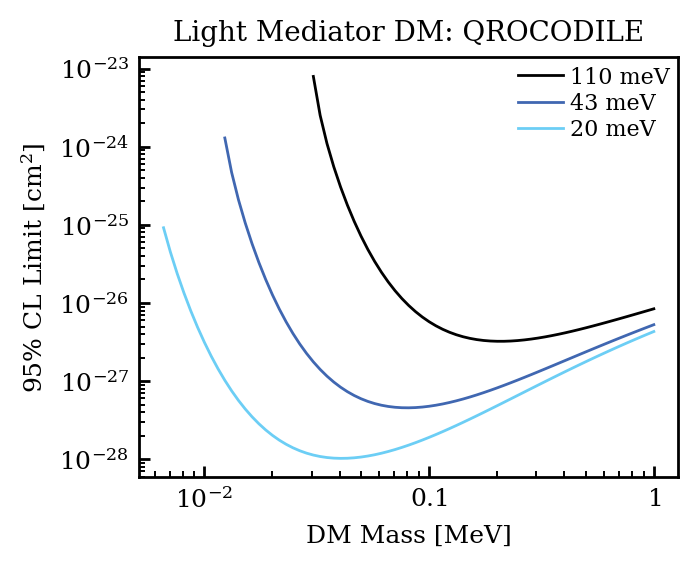

In [24]:
masses = np.logspace(np.log10(0.001), np.log10(1), 100)
plt.plot(masses, [calculate_qrocodile_light_limit_corrected(dm_mass_MeV=m) for m in masses], label="110 meV")
plt.plot(masses, [calculate_qrocodile_light_limit_corrected(dm_mass_MeV=m, threshold_eV=0.043) for m in masses], label="43 meV")
plt.plot(masses, [calculate_qrocodile_light_limit_corrected(dm_mass_MeV=m, threshold_eV=0.02) for m in masses], label="20 meV")
plt.xlabel(r'DM Mass [MeV]')
plt.ylabel(r'95% CL Limit [cm$^2$]')
plt.title('Light Mediator DM: QROCODILE')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')
plt.show()


In [38]:
import pandas as pd
qrocodile = pd.read_csv('qrocodile_limit.csv', header=None, names=['mass_MeV', 'limit_cm2'])

/var/folders/b4/tkxxqysd1pd6vc7155459qcm0000gn/T/ipykernel_14060/2117859441.py:265: RuntimeWarning: divide by zero encountered in scalar divide
  limit_sigma = N_limit / events_expected_per_sigma_cm2


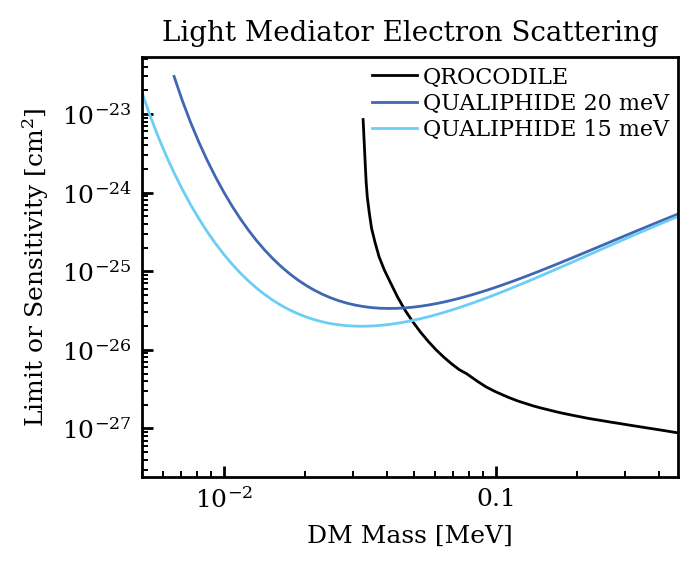

In [ ]:
masses = np.logspace(np.log10(0.001), np.log10(1), 100)
plt.plot(qrocodile['mass_MeV'], qrocodile['limit_cm2'], label='QROCODILE')
#plt.plot(masses, [calculate_qrocodile_light_limit_corrected(dm_mass_MeV=m, observed_events=7400,exposure_hours=415.15) for m in masses], label="110 meV")
#plt.plot(masses, [calculate_qrocodile_light_limit_corrected(dm_mass_MeV=m, observed_events=7400,exposure_hours=415.15, threshold_eV=0.043) for m in masses], label=r"$E_\mathrm{thr}=$43 meV")
plt.plot(masses, [calculate_qrocodile_light_limit_corrected(dm_mass_MeV=m, observed_events=7400,exposure_hours=415.15, threshold_eV=0.02) for m in masses], label=r"QUALIPHIDE 20 meV")
plt.plot(masses, [calculate_qrocodile_light_limit_corrected(dm_mass_MeV=m, observed_events=7400,exposure_hours=415.15, threshold_eV=0.015) for m in masses], label=r"QUALIPHIDE 15 meV")

plt.xlabel(r'DM Mass [MeV]')
plt.ylabel(r'Limit or Sensitivity [cm$^2$]')
plt.title('Light Mediator Electron Scattering')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')
plt.ylim(1e-26, 1e-23)
plt.xlim(5e-3, 0.47)
plt.show()


In [19]:
415.15 * 3600 * 5e-3

7472.7

# Recalculation

Following [Noah's calculation](https://arxiv.org/pdf/2601.02474), the differential DM scattering rate per unit target mass:

$$
\frac{d \Gamma}{d \omega}=\frac{\pi \bar{\sigma}_e \rho_\chi}{\rho_{\mathrm{T}} m_\chi \mu_{e \chi}^2} \int d^3 \mathbf{v} f_\chi(\mathbf{v}) \int \frac{d^3 \mathbf{q}}{(2 \pi)^3} \mathcal{F}^2(q) \frac{q^2}{2 \pi \alpha} \operatorname{Im}\left(-\frac{1}{\epsilon_L(\omega, \mathbf{q})}\right) \delta\left(\omega-\omega_{\mathbf{q}}\right)
$$

- $\operatorname{Im}\left(-1 / \epsilon_L(\omega, \mathbf{q})\right)$ is the loss function of the material.
    - For bulk limit, it can be calculated by isotropic Lindhard function with a theoretical close form.
    - For thin films ($d^{-1} \ll q$), there is additional momenta-dependent corrections detailed in the QROCODILE paper. 
    - For both cases, there is an additional correction factor near SC gap: $$f_{\mathrm{eff}}(\omega) \approx \begin{cases}1-\frac{\omega-2 \Delta}{4 \Delta} & 2 \Delta<\omega<4 \Delta \\ \frac{1}{2} & 4 \Delta<\omega\end{cases}$$
- $\mu_{e \chi} \equiv m_e m_\chi / (m_e + m_\chi)$ is the reduced mass.
- $\bar{\sigma}_e=\left(\mu_{e \chi}^2 / \pi\right)\left|V\left(q_0\right)\right|^2$ is the fiducial cross section.
    - $q_0=\alpha m_e$ is a reference momentum. 
    - $V(q)=g_{e \chi}^2\left(q^2+m_\phi^2\right)^{-1}$ is a Yukawa potential.
- The ambient DM density is $\rho_\chi\approx 0.4~ \mathrm{GeV/cm^3}$.
- $f_\chi(\mathbf{v})$ is the SHM with $v_0=220 \mathrm{~km} / \mathrm{s}, v_{\oplus}=232 \mathrm{~km} / \mathrm{s}, \text { and } v_{\mathrm{esc}}=540 \mathrm{~km} / \mathrm{s}$. 
    - The integral can be simplified to halo integral by `wimpartes`:$$\int d^3 \mathbf{v} f_\chi(\mathbf{v}) \cdot \rightarrow \int_{0}^{\infin} f_\mathrm{halo}(v) \cdot$$
- $\mathcal{F}^2(q)=|V(q)|^2 /\left|V\left(q_0\right)\right|^2$ is the form factor.
    - For light mediator case, it is $\mathcal{F}^2(q)=\left(q_0 / q\right)^4$.
- The transferred energy in the scattering process by kinematics is $\omega_{\mathbf{q}}=\mathbf{q} \cdot \mathbf{v}-q^2 / 2 m_\chi$

$$
\begin{align}
\frac{d \Gamma}{d \omega} &= \gamma \int_{0}^{\infin} dv f_\mathrm{halo}(v) \int d^3 \mathbf{q} g(\omega, q)\delta\left(\omega- qv \cos \theta + q^2 / 2 m_\chi\right) \\ 
&= \gamma \int_{0}^{\infin} dv f_\mathrm{halo}(v) \int_{0}^{\infin}d q ~(2\pi) q^2 g(\omega, q) \int_{-1}^{1} d \cos \theta~ \delta\left(\omega- qv \cos \theta + q^2 / 2 m_\chi\right) \\
&= \gamma \int_{0}^{\infin} dv f_\mathrm{halo}(v) \int_{0}^{\infin}d q ~(2\pi) q^2 g(\omega, q) \int_{-1}^{1} d \cos \theta~ \frac{1}{qv} \delta\left( \cos \theta-\frac{q}{2 m_\chi v}-\frac{\omega}{qv}  \right) \\
&=2\pi \gamma \int_{v_\mathrm{min}}^{\infin} dv \frac{f_\mathrm{halo}(v)}{v} \int_{q_-}^{q_+}d q g(\omega, q) q
\end{align}
$$
- $\gamma \equiv \frac{\pi \bar{\sigma}_e \rho_\chi}{\rho_{\mathrm{T}} m_\chi \mu_{e \chi}^2}$
- $g(\omega, q) \equiv \frac{1}{(2 \pi)^3} \left(\alpha m_e / q\right)^4\frac{q^2}{2 \pi \alpha}\operatorname{Im}\left(-\frac{1}{\epsilon_L(\omega, \mathbf{q})}\right)$ where I neglected direction dependence of $q$.
- $q_\pm = m_\chi v \pm \sqrt{m_\chi^2 v^2 -2\omega m_\chi}$ are boundaries that satisfy $-1\leq\frac{q}{2 m_\chi v}+\frac{\omega}{q v}\leq1$ so that the integral of $\cos \theta$ over $\delta (\cdot)$ is $1$ rather than $0$.
    - This also requires $v_\mathrm{min}=\sqrt{2\omega/m_\chi}$

In summary, we get

$$
\frac{d \Gamma}{d \omega} = \frac{ \bar{\sigma}_e \rho_\chi \alpha^3 m_e^2 (m_e+m_\chi)^2}{8 \pi^2 \rho_{\mathrm{T}} m_\chi^3} \int_{\sqrt{2\omega/m_\chi}}^{\infty} d v \frac{f_{\text {halo }}(v)}{v} \int_{m_\chi v - \sqrt{m_\chi^2 v^2-2 \omega m_\chi}}^{m_\chi v + \sqrt{m_\chi^2 v^2-2 \omega m_\chi}} dq ~\frac{1}{q} \operatorname{Im}\left(-\frac{1}{\epsilon_L(\omega, q)}\right)
$$

It is worth noting that the integrals are dimensionless, and the overall dimension is $E^{-1}$

## Loss Function

Calculating the thin-film function will be difficult, lucikly Noah did this for us. We can interpolate the three curves over energy. Details:
- Assume no response for $q<1~\mathrm{eV}$.
- Assume no response difference above $q>100~\mathrm{eV}$.

In [1]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
plt.style.use('../xenonnt.mplstyle')

import wimprates as wr
import numericalunits as nu
from tqdm import tqdm

/Users/lanqingyuan/Documents/GitHub/wimprates/wimprates/__init__.py:6: UserWarning: Default WIMP parameters are changed in accordance with https://arxiv.org/abs/2105.00599 (github.com/JelleAalbers/wimprates/pull/14)
  warnings.warn(


In [2]:
def create_loss_function_interpolator_grid(
    filepath_1eV='1eV.csv',
    filepath_10eV='10eV.csv',
    filepath_100eV='100eV.csv'
):
    """
    Create a 2D interpolator that can evaluate on grids.
    Interpolates in log-log space for q (both log(q) and log(y)).
    
    The data files use eV units for both omega and q.
    Input omega and q should have proper units (via numericalunits).
    Output is dimensionless (loss function).
    """
    data_1 = np.loadtxt(filepath_1eV, delimiter=',')
    data_10 = np.loadtxt(filepath_10eV, delimiter=',')
    data_100 = np.loadtxt(filepath_100eV, delimiter=',')
    
    # Data is in eV, create interpolators with raw numbers
    interp_q1 = interp1d(data_1[:, 0], data_1[:, 1], 
                         kind='linear', bounds_error=False, fill_value=0.0)
    interp_q10 = interp1d(data_10[:, 0], data_10[:, 1], 
                          kind='linear', bounds_error=False, fill_value=0.0)
    interp_q100 = interp1d(data_100[:, 0], data_100[:, 1], 
                           kind='linear', bounds_error=False, fill_value=0.0)
    
    # q nodes in eV (raw numbers matching the file convention)
    q_nodes_eV = np.array([1.0, 10.0, 100.0])
    log_q_nodes = np.log10(q_nodes_eV)
    
    def interpolate(omega, q):
        """
        Interpolate loss function. Supports scalar, 1D arrays, or 2D grids.
        
        Parameters
        ----------
        omega : float or array-like
            Energy values with units (e.g., 0.5 * nu.eV or 100 * nu.meV).
        q : float or array-like
            Momentum values with units (e.g., 5 * nu.eV).
        
        Returns
        -------
        float or ndarray
            Dimensionless interpolated loss function value(s).
        """
        # Convert inputs from numericalunits to eV (raw numbers)
        omega_eV = np.atleast_1d(omega / nu.eV)
        q_eV = np.atleast_1d(q / nu.eV)
        
        # Clamp q to [1, 100] eV for extrapolation
        q_clamped = np.clip(q_eV, 1.0, 100.0)
        log_q = np.log10(q_clamped)
        
        # Get values at the three q nodes for all omega
        y1 = interp_q1(omega_eV)
        y10 = interp_q10(omega_eV)
        y100 = interp_q100(omega_eV)
        
        # Shape: (len(omega), 3)
        y_nodes = np.column_stack([y1, y10, y100])
        
        # Result shape: (len(omega), len(q))
        result = np.zeros((len(omega_eV), len(q_eV)))
        
        for j, lq in enumerate(log_q):
            if lq <= log_q_nodes[0]:
                result[:, j] = y_nodes[:, 0]
            elif lq >= log_q_nodes[2]:
                result[:, j] = y_nodes[:, 2]
            elif lq <= log_q_nodes[1]:
                t = (lq - log_q_nodes[0]) / (log_q_nodes[1] - log_q_nodes[0])
                # Log interpolation: y = y1^(1-t) * y2^t
                y_lo, y_hi = y_nodes[:, 0], y_nodes[:, 1]
                mask = (y_lo > 0) & (y_hi > 0)
                result[mask, j] = np.exp(
                    np.log(y_lo[mask]) * (1 - t) + np.log(y_hi[mask]) * t
                )
                result[~mask, j] = y_lo[~mask] * (1 - t) + y_hi[~mask] * t
            else:
                t = (lq - log_q_nodes[1]) / (log_q_nodes[2] - log_q_nodes[1])
                y_lo, y_hi = y_nodes[:, 1], y_nodes[:, 2]
                mask = (y_lo > 0) & (y_hi > 0)
                result[mask, j] = np.exp(
                    np.log(y_lo[mask]) * (1 - t) + np.log(y_hi[mask]) * t
                )
                result[~mask, j] = y_lo[~mask] * (1 - t) + y_hi[~mask] * t
        
        return np.squeeze(result)
    
    return interpolate

In [3]:
loss_interp = create_loss_function_interpolator_grid()

In [ ]:
def calc_rate(omegas, m_chi=10*nu.keV, sigma_e=1e-25*nu.cm**2, 
              rho_T=2.7*nu.g/nu.cm**3, rho_chi=0.4*nu.GeV/nu.cm**3, 
              v_steps=100, q_steps=10, q_min_cutoff=0.1*nu.eV):
    """Differential scattering rate per unit target mass. In natural units with dimension [1/energy].
    $$
    \frac{d \Gamma}{d \omega} = \frac{ \bar{\sigma}_e \rho_\chi \alpha^3 m_e^2 (m_e+m_\chi)^2}{8 \pi^2 \rho_{\mathrm{T}} m_\chi^3} \int_{\sqrt{2\omega/m_\chi}}^{\infty} d v \frac{f_{\text {halo }}(v)}{v} \int_{m_\chi v - \sqrt{m_\chi^2 v^2-2 \omega m_\chi}}^{m_\chi v + \sqrt{m_\chi^2 v^2-2 \omega m_\chi}} dq ~\frac{1}{q} \operatorname{Im}\left(-\frac{1}{\epsilon_L(\omega, q)}\right)
    $$
    
    Parameters
    ----------
    omegas : array-like
        Energy transfer values (with units, e.g., nu.eV)
    m_chi : float
        Dark matter mass (with units)
    sigma_e : float
        Fiducial cross section (with units)
    rho_T : float
        Target mass density (with units)
    rho_chi : float
        Local DM density (with units)
    v_steps : int
        Number of velocity integration points
    q_steps : int
        Number of momentum integration points
    q_min_cutoff : float
        Minimum q value to avoid 1/q divergence (default: 0.1 eV, matches loss 
        function data range)
    
    Returns
    -------
    rate : ndarray
        Differential rate dΓ/dω for each omega value. In natural units with dimension [1/energy].
    """
    m_e = 0.511 * nu.MeV
    alpha = 1/137
    c = 299792458 * nu.m/nu.s
    hbar = 6.582119569e-16 * nu.eV * nu.s  # ℏ in eV·s
    hbar_c = hbar * c
    
    # The formula is derived in natural units (ℏ=c=1). To use SI quantities:
    # - Cross section σ [cm²] needs conversion to [1/energy²] via (ℏc)²
    # - The velocity integral ∫dv needs factor of c to become dimensionless ∫dβ
    # Combined conversion factor for σ × c:
    # σ_natural = σ_SI / (ℏc)², and v_integral_natural = v_integral_SI × c
    # Net factor: c / (ℏc)² = 1/(ℏ²c)
    
    prefactor = ((sigma_e/hbar_c**2) * rho_chi * alpha**3 * m_e**2 * (m_e + m_chi)**2) / \
                (8 * np.pi**2 * rho_T * m_chi**3)

    omegas = np.atleast_1d(omegas)
    v_max = 800 * nu.km/nu.s  # Higher than escape velocity cutoff; SI units
    
    rate = np.zeros(len(omegas))
    halo_model = wr.StandardHaloModel()
    
    for j, omega in enumerate(omegas):
        # v_min for this specific omega
        v_min = np.sqrt(2 * omega / m_chi) * c # SI units
        
        # Skip if v_min exceeds v_max (kinematically forbidden)
        if v_min >= v_max:
            continue
        
        # Velocity grid for this omega
        v_grid = np.linspace(v_min, v_max, v_steps)
        f_halo = halo_model.velocity_dist(v_grid, t=None)
        
        # Replace NaN/inf in f_halo with 0 (occurs near escape velocity)
        f_halo = np.where(np.isfinite(f_halo), f_halo, 0.0)
        
        # Compute q integral for each velocity point
        q_integrals = np.zeros(v_steps)
        for i, v in enumerate(v_grid):
            # Convert velocity to dimensionless β = v/c (natural units convention)
            # This ensures q comes out in energy units, matching loss_interp's expectation
            beta = v / c
            discriminant = m_chi**2 * beta**2 - 2 * omega * m_chi  # energy²
            if discriminant <= 0:
                continue
            sqrt_disc = np.sqrt(discriminant)  # energy
            q_min = m_chi * beta - sqrt_disc   # momentum in energy units (natural units)
            q_max = m_chi * beta + sqrt_disc
            
            # Enforce minimum q to avoid 1/q divergence and match loss data range
            q_min = max(q_min, q_min_cutoff)
            
            if q_max <= q_min:
                continue
            
            q_grid = np.linspace(q_min, q_max, q_steps) # natural units
            loss_q = loss_interp(omega, q_grid)  # scalar omega, array q
            
            # Integrand for q: (1/q) × Im(-1/ε_L)
            q_integrand = loss_q / q_grid
            q_integrals[i] = np.trapezoid(q_integrand, q_grid)
        
        # v integral: ∫ dv (f_halo/v) × [q_integral]
        v_integrand = f_halo / (v_grid/c)* q_integrals # Make v dimensionless
        # Handle any remaining NaN/inf
        v_integrand = np.where(np.isfinite(v_integrand), v_integrand, 0.0)
        rate[j] = prefactor * np.trapezoid(v_integrand, v_grid)
    
    return rate

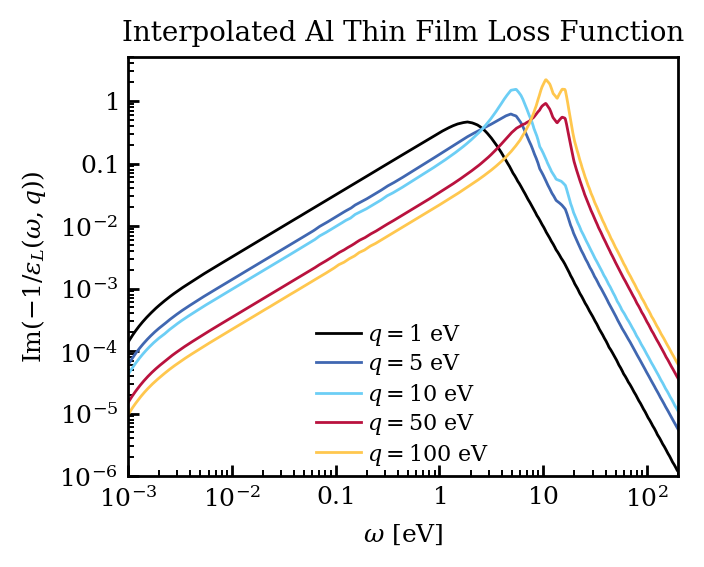

In [12]:
omegas_eV = np.logspace(np.log10(5e-4), np.log10(2e2), 1000) * nu.eV
qs_eV = np.array([1, 5, 10, 50, 100]) * nu.eV
for q in qs_eV:
    loss_q = loss_interp(omegas_eV, q)
    plt.plot(omegas_eV/nu.eV, loss_q, label=r"$q={}~$eV".format(int(q/nu.eV)))

plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlim(1e-3, 2e2)
plt.ylim(1e-6, 5)
plt.xlabel(r"$\omega$ [eV]")
plt.ylabel(r"$\mathrm{Im}\left(-1/\epsilon_L(\omega, q)\right)$")
plt.title("Interpolated Al Thin Film Loss Function")
plt.show()



/Users/lanqingyuan/Documents/GitHub/wimprates/wimprates/halo.py:161: RuntimeWarning: divide by zero encountered in divide
  (v_esc**2 - v_earth_t**2 - v**2)


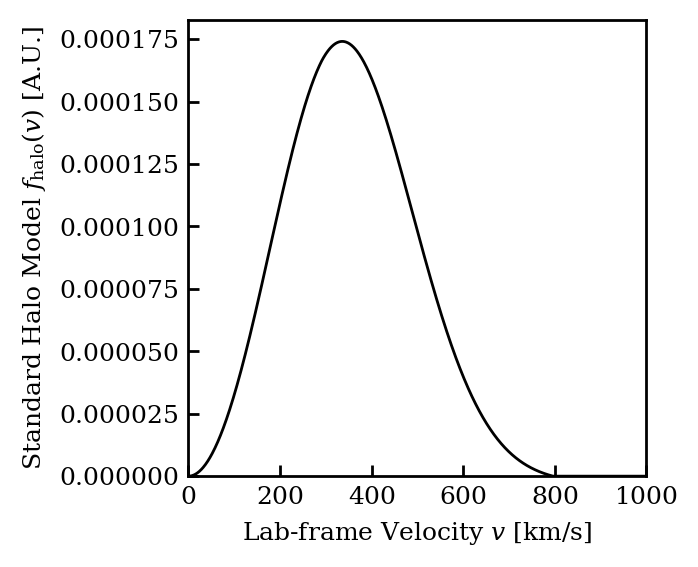

In [13]:

halo_model = wr.StandardHaloModel()
v_kms = np.linspace(0, 1000, 1001) *nu.km/nu.s
plt.plot(v_kms/nu.km*nu.s, halo_model.velocity_dist(v_kms, t=None))
plt.xlabel(r"Lab-frame Velocity $v$ [km/s]")
plt.ylabel(r"Standard Halo Model $f_\mathrm{halo}(v)$ [A.U.]")
plt.xlim(0, 1000)
plt.ylim(0,)
plt.show()

In [14]:
np.trapz(halo_model.velocity_dist(v_kms, t=None), v_kms)

/var/folders/b4/tkxxqysd1pd6vc7155459qcm0000gn/T/ipykernel_23794/827948395.py:1: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  np.trapz(halo_model.velocity_dist(v_kms, t=None), v_kms)


np.float64(0.9700062852054646)

In [ ]:
# Natural units, dimension: [1/energy]
rates_1keV = calc_rate(omegas_eV, m_chi=1*nu.keV, sigma_e=1e-25*nu.cm**2, v_steps=100, q_steps=100)
rates_10keV = calc_rate(omegas_eV, m_chi=10*nu.keV, sigma_e=1e-25*nu.cm**2, v_steps=100, q_steps=100)
rates_100keV = calc_rate(omegas_eV, m_chi=100*nu.keV, sigma_e=1e-25*nu.cm**2, v_steps=100, q_steps=100)

In [35]:
# QROCODILE limit corresponding to 15 events/415 hours with 1.64 ng target
rates_100keV_qrocodile = calc_rate(omegas_eV, m_chi=100*nu.keV, sigma_e=1e-27*nu.cm**2, v_steps=100, q_steps=100, rho_T=9.3*nu.g/nu.cm**3)

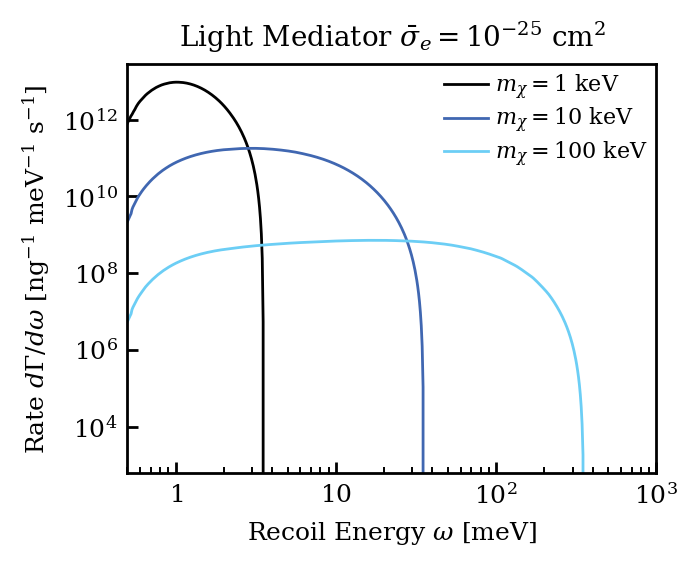

In [ ]:
# Convert rate to [events / (nanogram * meV * s)]
#unit_conv = nu.g * nu.meV * nu.s
unit_conv = 8.52e35 * nu.eV # 
plt.plot(omegas_eV/nu.meV, rates_1keV * unit_conv, label=r"$m_\chi=1~\mathrm{keV}$")
plt.plot(omegas_eV/nu.meV, rates_10keV * unit_conv, label=r"$m_\chi=10~\mathrm{keV}$")
plt.plot(omegas_eV/nu.meV, rates_100keV * unit_conv, label=r"$m_\chi=100~\mathrm{keV}$")
plt.yscale("log")
plt.xlabel(r"Recoil Energy $\omega$ [meV]")
plt.ylabel(r"Rate $d\Gamma/d\omega$ [ng$^{-1}$ meV$^{-1}$ s$^{-1}$]")
plt.xlim(0)
plt.legend(loc="best")
plt.title(r"Light Mediator $\bar{\sigma}_e=10^{-25}~\mathrm{cm}^2$")
plt.xlim(0.5, 1000)
plt.xscale("log")
plt.show()


This looks really too high! Let's use the machine we made to predict QROCODILE at the limit, then scale back. This is correct-ish when our computation is right in the shape.

In [29]:
def count_dcr(omegas_meV, rates_ngmevs, sigma_e=1e-25*nu.cm**2, threshold_meV=20, target_mass_ng=1.18, reference_sigma_e=1e-25*nu.cm**2):
    """Count the number of DCR events in a given rate spectrum.
    """
    rates_ngmevs = np.array(rates_ngmevs)
    integrated_rate = np.trapz(rates_ngmevs[omegas_meV>threshold_meV], omegas_meV[omegas_meV>threshold_meV])
    return integrated_rate * target_mass_ng



In [ ]:
dcr_1keV = count_dcr(omegas_eV/nu.meV, rates_1keV * unit_conv, threshold_meV=20, target_mass_ng=1.18)
dcr_10keV = count_dcr(omegas_eV/nu.meV, rates_10keV * unit_conv, threshold_meV=20, target_mass_ng=1.18)
dcr_100keV = count_dcr(omegas_eV/nu.meV, rates_100keV * unit_conv, threshold_meV=20, target_mass_ng=1.18)

/var/folders/b4/tkxxqysd1pd6vc7155459qcm0000gn/T/ipykernel_23794/3647940950.py:5: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integrated_rate = np.trapz(rates_ngmevs[omegas_meV>threshold_meV], omegas_meV[omegas_meV>threshold_meV])


In [36]:
dcr_100keV_qrocodile = count_dcr(
    omegas_eV/nu.meV, rates_100keV_qrocodile * unit_conv, 
    threshold_meV=110, target_mass_ng=1.64
)

/var/folders/b4/tkxxqysd1pd6vc7155459qcm0000gn/T/ipykernel_23794/3647940950.py:5: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integrated_rate = np.trapz(rates_ngmevs[omegas_meV>threshold_meV], omegas_meV[omegas_meV>threshold_meV])


In [39]:
dcr_qrocodile_observed = 15/415/3600
dcr_qrocodile_observed

1.0040160642570281e-05

In [40]:
boosted_factor = dcr_qrocodile_observed / dcr_100keV_qrocodile

In [34]:
dcr_100keV

np.float64(62554916573.45599)

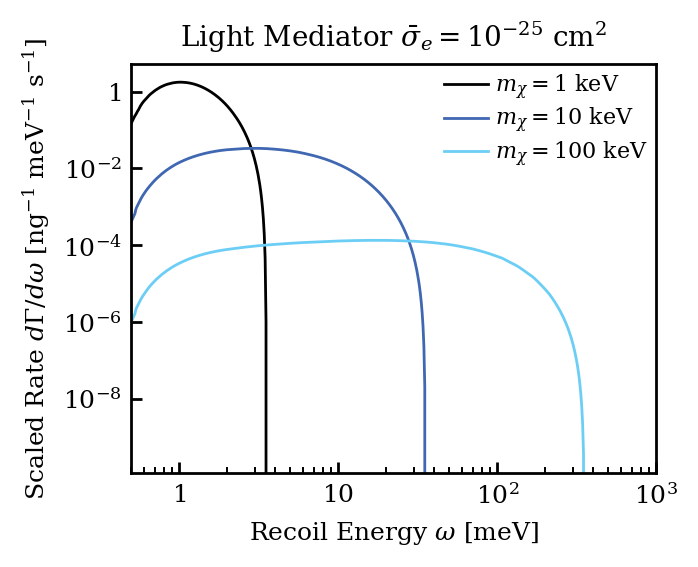

In [ ]:
# Convert rate to [events / (nanogram * meV * s)]
#unit_conv = nu.g * nu.meV * nu.s
unit_conv = 8.52e35 * nu.eV # 
plt.plot(omegas_eV/nu.meV, rates_1keV * unit_conv * boosted_factor, label=r"$m_\chi=1~\mathrm{keV}$")
plt.plot(omegas_eV/nu.meV, rates_10keV * unit_conv * boosted_factor, label=r"$m_\chi=10~\mathrm{keV}$")
plt.plot(omegas_eV/nu.meV, rates_100keV * unit_conv * boosted_factor, label=r"$m_\chi=100~\mathrm{keV}$")
plt.yscale("log")
plt.xlabel(r"Recoil Energy $\omega$ [meV]")
plt.ylabel(r"Corrected Rate $d\Gamma/d\omega$ [ng$^{-1}$ meV$^{-1}$ s$^{-1}$]")
plt.xlim(0)
plt.legend(loc="best")
plt.title(r"Light Mediator $\bar{\sigma}_e=10^{-25}~\mathrm{cm}^2$")
plt.xlim(0.5, 1000)
plt.xscale("log")
plt.show()


Get a first order correct bkg model

In [87]:
def gaussian(x, mu, sig):
    return (
        1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)
    )

energies_meV = np.linspace(0, 1000, 10001) / 2
bkg_model = 5e-2 * gaussian(energies_meV, 15, 3) + 1e-5
bkg_model[energies_meV<10] = 0

In [88]:
np.trapz(bkg_model[energies_meV>30], energies_meV[energies_meV>30])

/var/folders/b4/tkxxqysd1pd6vc7155459qcm0000gn/T/ipykernel_23794/3197404986.py:1: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  np.trapz(bkg_model[energies_meV>30], energies_meV[energies_meV>30])


np.float64(0.004699513151857446)

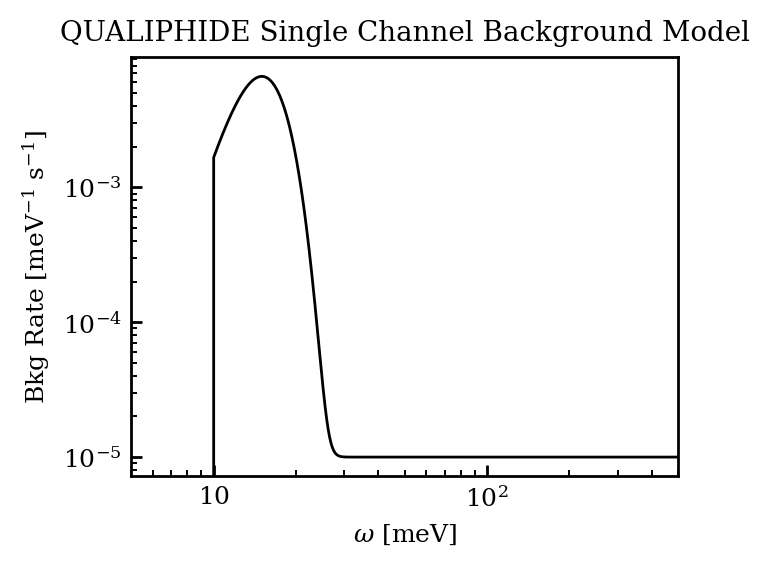

In [93]:
plt.plot(energies_meV, bkg_model)
plt.xlabel(r"$\omega$ [meV]")
plt.ylabel(r"Bkg Rate [meV$^{-1}$ s$^{-1}$]")
plt.xlim(5, 500)
plt.xscale("log")
plt.yscale("log")
plt.title("QUALIPHIDE Single Channel Background Model")
plt.show()


Compute expected DCR at 1e-25 cm2.

In [61]:
from tqdm import tqdm
dcr_hz_dict = {}
masses = np.logspace(np.log10(1), np.log10(100), 50)*nu.keV
for thr_meV in [5, 10, 20]:
    dcr_hz_array = np.zeros(len(masses))
    dcr_hz_dict[thr_meV] = dcr_hz_array
    for i, m_chi in tqdm(enumerate(masses)):
        rates = calc_rate(omegas_eV, m_chi=m_chi, sigma_e=1e-25*nu.cm**2, v_steps=20, q_steps=10)
        dcr_hz = count_dcr(omegas_eV/nu.meV, rates * unit_conv * boosted_factor, threshold_meV=thr_meV, target_mass_ng=1.18)
        dcr_hz_array[i] = dcr_hz

0it [00:00, ?it/s]/var/folders/b4/tkxxqysd1pd6vc7155459qcm0000gn/T/ipykernel_23794/3647940950.py:5: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integrated_rate = np.trapz(rates_ngmevs[omegas_meV>threshold_meV], omegas_meV[omegas_meV>threshold_meV])
50it [00:28,  1.73it/s]
50it [00:27,  1.80it/s]
50it [00:27,  1.83it/s]


In [95]:
assumed_qualphide_dcr_Hz = 5e-3 # 5 mHz
reference_sigma_e = 1e-25
sensi_dict = {}
for thr_meV in [5, 10, 20]:
    observed_dcr_hz = np.trapz(bkg_model[energies_meV>thr_meV], energies_meV[energies_meV>thr_meV])
    sensi_dict[thr_meV] = observed_dcr_hz/ dcr_hz_dict[thr_meV] * reference_sigma_e

/var/folders/b4/tkxxqysd1pd6vc7155459qcm0000gn/T/ipykernel_23794/3774318117.py:5: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  observed_dcr_hz = np.trapz(bkg_model[energies_meV>thr_meV], energies_meV[energies_meV>thr_meV])
/var/folders/b4/tkxxqysd1pd6vc7155459qcm0000gn/T/ipykernel_23794/3774318117.py:6: RuntimeWarning: divide by zero encountered in divide
  sensi_dict[thr_meV] = observed_dcr_hz/ dcr_hz_dict[thr_meV] * reference_sigma_e


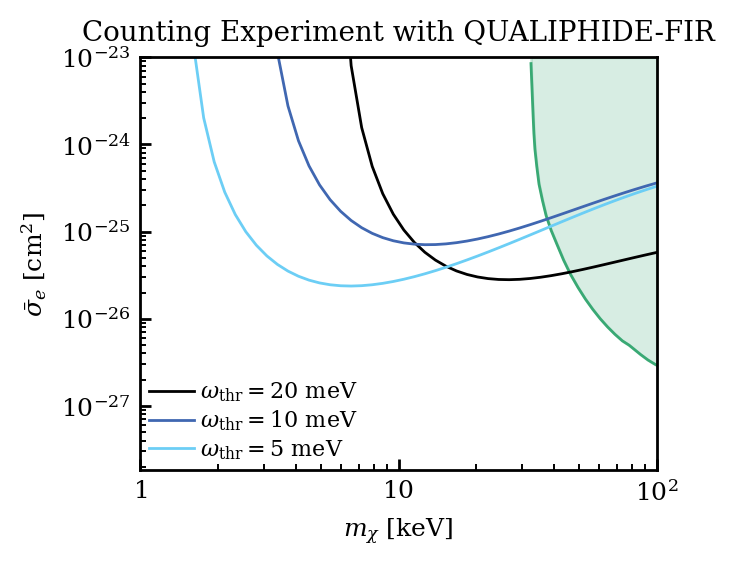

In [96]:
import pandas as pd
import straxion
straxion.register_xenon_colors()
qrocodile = pd.read_csv('qrocodile_limit.csv', header=None, names=['mass_MeV', 'limit_cm2'])
plt.plot(qrocodile['mass_MeV']*1e3, qrocodile['limit_cm2'], color='xenon_green')
plt.fill_between(qrocodile['mass_MeV']*1e3, qrocodile['limit_cm2'], 1e-23, color='xenon_green', alpha=0.2)
for thr_meV in [5, 10, 20][::-1]:
    plt.plot(masses/nu.keV, sensi_dict[thr_meV], label=fr"$\omega_\mathrm{{thr}}={thr_meV}~\mathrm{{meV}}$")

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$m_\chi$ [keV]")
plt.ylabel(r"$\bar{\sigma}_e$ [cm$^{{2}}$]")
plt.xlim(1, 1e2)
plt.title("Counting Experiment with QUALIPHIDE-FIR")
plt.ylim(None, 1e-23)
plt.legend(loc="best")
plt.show()
